# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### Data

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

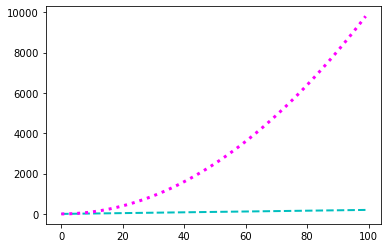

In [3]:
# OPTION 1
# Create a figure of a fixed size
plt.figure()

# First plot
plt.plot(x,y, color='c', linestyle='dashed', linewidth=2)

# Second plot
plt.plot(x,z, color='magenta', linestyle='dotted', linewidth=3)

# Show the plot
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

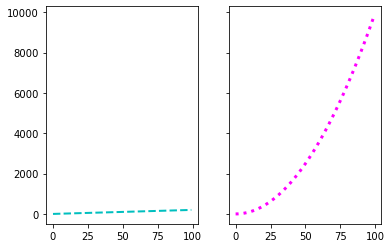

In [4]:
# OPTION 2

# Create a figure of a fixed size and axes
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

# Plots
axs[0].plot(x,y, color='c', linestyle='dashed', linewidth=2)
axs[1].plot(x,z, color='magenta', linestyle='dotted', linewidth=3)

# Show the plot
plt.show()

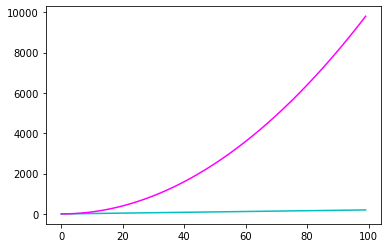

In [5]:
# OPTION 3

# Create a figure of a fixed size and axes
plt.figure()

# Plots
plt.plot(x,y, 'c', x,z, 'magenta')

# Show the plot
plt.show()

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

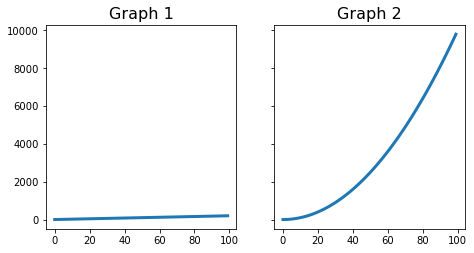

In [6]:
# ENHANCED VERSION to see more matplotlib features

# Variables
fs = 16 # fontsize
fw = 700 # fontweight
lw = 3 # lineweight
y_rot = 0 # ylabel rotation

# Create a figure of a fixed size and axes
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(7.5,3.75))

# First plot adding a title and x and y labels
axs[0].plot(x,y, lw=3)
axs[0].set_title('Graph 1', fontsize=16)

# Second plot adding a title and x and y labels
axs[1].plot(x,z, lw=3)
axs[1].set_title('Graph 2',fontsize=16)

# Show the plot
plt.show()

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

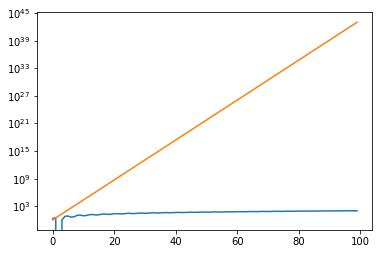

In [7]:
y=x^2
z=np.exp(x)

# Create a figure of a fixed size and axes
plt.figure()

# Normal plot
plt.plot(y)
plt.plot(z)

# Logarithmic scale
plt.yscale('log')

# Show plot
plt.show()

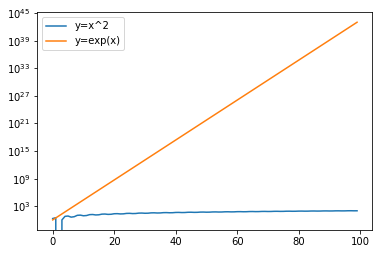

In [8]:
# ALTERNATIVE WITH LEGEND

# Create a figure of a fixed size and axes
plt.figure()

# Normal plot
plt.plot(y, label="y=x^2")
plt.plot(z, label="y=exp(x)")

# Logarithmic scale
plt.yscale('log')

#Add legend 
plt.legend()

# Show plot
plt.show()

# Challenge 2

Import the Fitbit2.csv file and name your dataset fitbit. Download the data from [here](https://drive.google.com/file/d/17TW-w-izKuR7bLoa0Mnyp9YN9zEQNXq-/view?usp=sharing) and place it in the data folder. Access it through a relative path.

In [9]:
# Read the data
fitbit = pd.read_csv('.\\data\\Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

In [72]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month and weekendday/workday
median_steps = fitbit[['Steps','Months','Months_encoded']].groupby('Months').median().reset_index()
weekend_work = fitbit[['Steps', 'Work_or_Weekend']].groupby(['Work_or_Weekend']).median().reset_index()

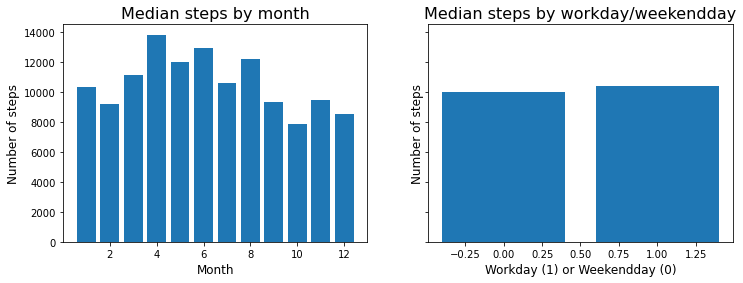

<Figure size 432x288 with 0 Axes>

In [84]:
"""
I changed the order of lines a bit, otherwise the sca(ax[0]) wasn't working
(said something about not finding axes)
"""

#Create a figure of a fixed size and axes
f, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(12,4))

x1 = median_steps['Months_encoded']
y1 = median_steps['Steps']
x2 = weekend_work['Work_or_Weekend']
y2 = weekend_work['Steps']

# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
plt.sca(ax[0])
# Plot the steps in the current axes
plt.bar(x1, y1)

# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
plt.sca(ax[1])
# Plot the workday and weekend steps in the current axes
plt.bar(x2, y2)

# Add labels, title, etc
ax[0].set_title('Median steps by month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Number of steps', fontsize=12)
ax[1].set_title('Median steps by workday/weekendday', fontsize=16)
ax[1].set_xlabel('Workday (1) or Weekendday (0)', fontsize=12)
ax[1].set_ylabel('Number of steps', fontsize=12)

# Show plots
plt.show()

# Save the figure
plt.savefig('New figure', dpi = 400)

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

In [123]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 
df = fitbit[['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']]

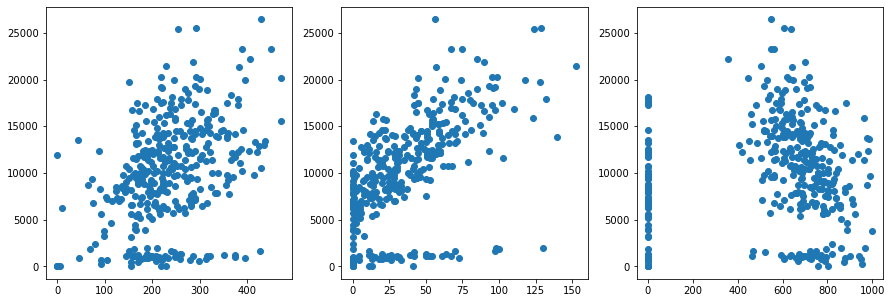

In [124]:
"""Create a sample to know what I'm working towards"""

# Create a figure of a fixed size and axes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Iterate to draw each scatter plot
a = df['Minutes Lightly Active']
b = df['Minutes Very Active']
c = df['Minutes Sedentary']
y = df['Steps']

ax[0].scatter(a, y)
ax[1].scatter(b, y)
ax[2].scatter(c, y)

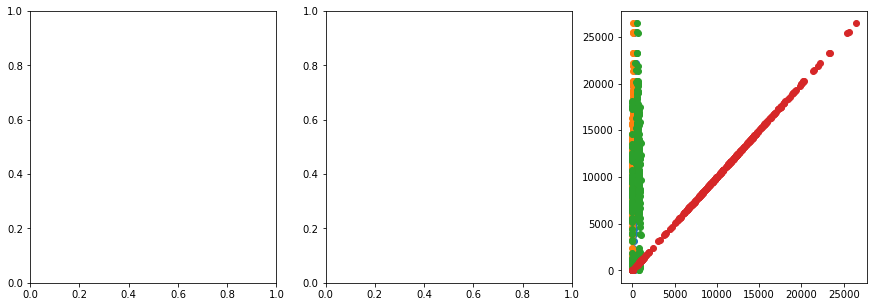

In [138]:
# Create a figure of a fixed size and axes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Iterate to draw each scatter plot

for column in df:
    y = df['Steps']
    plt.scatter(df[column], y)
plt.show()

In [ ]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 

# Create a figure of a fixed size and axes

# Iterate to draw each scatter plot
